In [41]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

# Dimensional parameters
# half length of strip
L = 1000.0 # (m)
# half width of sticky patch
s = 100.0 # (m)

# thickness of basal crevasse
W = 0.1 # (m)
# ice thickeness
H = 100.0 # (m)
# crack length
Zc = 50.0 # (m)

# density of w-water i-ice
rho_w = 1000 # (kg/m^3)
rho_i = 917 # (kg/m^3)
# gravitational acceleration
g = 9.8 # (m/s^2)

# physical properties
# latent heat
Lw = 3.335e5 #(J/kg)
# heat capacity
Cp = 2097 #(J/kg/K)
# thermal diffusity
kappa = 1.09e-6 # m^2/s

# characteristic sliding velocity
v_sliding_y = 100 # m*a-1
v_s = v_sliding_y / (365*24*3600) # sliding velocity in m/s
Delta_ty = s / v_sliding_y # year
Delta_t = Delta_ty * (365*24*3600)
# line heat source
qi = rho_i*Lw*W
Ti = qi/rho_i/Cp
pi=math.pi

In [42]:
def greensx(x,t):
    return 1/(2*np.sqrt(kappa*pi*t))*np.exp(-x**2/(4*kappa*t))
def greensn(z,t,n):
    return 1/n*np.sin(n*pi*z/H)*np.exp(-kappa*n*n*pi*pi*t/(H**2))*(1-np.cos(n*pi*Zc/H))
def greensz(z,t):
    sun_n_old=0
    sum_n_new=0
    for i in range(1,11):
        sum_n_old = sum_n_new
        sum_n_new = sum_n_old + greensn(z,t,i)
    return 2/(pi)*sum_n_new
def greens(x,z,t,n):
    return Ti*greensx(x-n*s,t+n*Delta_t)*greensz(z,t+n*Delta_t)

# function to cumpute T_net
def T_net(x,z,t,num):
    T_sum = 0
    for n in range(num):
        T_sum += T_sum + greens(x,z,t,n)
    return T_sum

In [43]:
# time range
year_start = 40
year_end = 80
tstp = 1
vt_y = np.arange(year_start,year_end + tstp,tstp)
vt = 365*24*3600*vt_y
# vt = 365*24*3600*np.arange(year,year + tstp/2,tstp)
nt = np.shape(vt)[0]

nx, nz = (500, 50)
xl=2*L
xr=3*L
x = np.linspace(xl, xr, nx+1)
xstp = x[1]-x[0]
z = np.linspace(0, H, nz+1)
zstp = z[1]-z[0]

xT = np.linspace(xl+0.5*xstp, xr-0.5*xstp, nx)
zT = np.linspace(0+0.5*zstp, H-0.5*xstp, nz)

dTx = np.zeros((nx))
dTz = np.zeros((nz))
dT = np.zeros((nz,nx,nt))

In [44]:
# Thermal conduction in x,z-direction
for it,time in enumerate(vt):
    num_crack = math.ceil(vt_y[it] / Delta_ty)
    print(it,num_crack)
    for nindex in range(num_crack):
        t_init = nindex*Delta_t
        xprime = v_s*(time-t_init)
        for ix,xcoord in enumerate(xT):
            dTx[ix] = greensx(xcoord-xprime,time-t_init)
        for iz,zcoord in enumerate(zT):
            dTz[iz] = greensz(zcoord,time-t_init)
        for ix,xcoord in enumerate(xT):
            for iz,zcoord in enumerate(zT):
                dT[iz,ix,it] += Ti*dTx[ix]*dTz[iz]

0 40
1 41
2 42
3 43
4 44
5 45
6 46
7 47
8 48
9 49
10 50
11 51
12 52
13 53
14 54
15 55
16 56
17 57
18 58
19 59
20 60
21 61
22 62
23 63
24 64
25 65
26 66
27 67
28 68
29 69
30 70
31 71
32 72
33 73
34 74
35 75
36 76
37 77
38 78
39 79
40 80


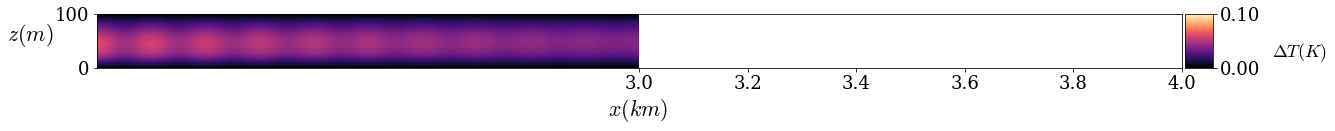

In [45]:
# Create new Figure and an Axes which fills it.
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rc('font', family='serif')
mpl.rcParams["mathtext.fontset"]='cm'
plt.rcParams['figure.figsize'] = (20.0, 12.0)
fs=18
fs_label=22

# time 
it=40
dT_current = dT[:,:,it]

fig, ax1 = plt.subplots()
plt.rc('xtick', labelsize=fs)
plt.rc('ytick', labelsize=fs)
plt.rc('axes', labelsize=fs)

ax1 = plt.gca()
# ax1.set_xlabel(r'$x$',fontsize=22)
ax1.set_ylabel(r'$z(m)$ ',rotation=0,fontsize=fs_label,loc='center')
ax1.set_xlabel(r'$x(km)$ ',rotation=0,fontsize=fs_label,loc='center')
ax1.set_xlim([xl, xr])
ax1.set_ylim([0, H])
ax1.set_xticks([3000,3200,3400,3600,3800,4000])
ax1.set_xticklabels(('3.0', '3.2', '3.4', '3.6', '3.8','4.0'))
ax1.set_aspect('equal')
ax1.yaxis.set_label_coords(-0.06, 0.35)

# plt.title(r'$\sigma_{xx}$ when $w=1$, $c=0.5$, $f=0.7$', fontsize=16, color='k')
#time_template = 'time = %.1fy'
#time_text = ax1.text(0.02, 0.75, time_template % (vt_y[it]), transform=ax1.transAxes, color='w',fontsize=18)
#time_text.set_text(time_template % (vt_y[it]))
# text=ax1.annotate(r'$t=$'+str(round(vt_y[it],2))+' y', xy=(0.05, 0.75), xycoords='axes fraction',fontsize=18,color='w')

# temperature
norm = mpl.colors.Normalize(vmin=0, vmax=0.1)
cmap = mpl.cm.magma
temperature = ax1.pcolormesh(x,z,dT_current,shading='flat',cmap=cmap,norm=norm) # plot the pcolor

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="2.5%", pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, format="%2.2f")
cbar.set_label(r'$\Delta T (K)$ ',loc='center',rotation=0,labelpad=40,fontsize=18)

plt.savefig('Heat_adv_diffusion'+'.png', bbox_inches='tight', dpi=100)

In [46]:
#def update(tindex):
#    dT_current=dT[:,:,tindex]  
#    # temperature
#    temperature = ax1.pcolormesh(x,z,dT_current,shading='flat',cmap=cmap,norm=norm) # plot the pcolor
#    time_text.set_text(time_template % (vt_y[tindex]))
#    return time_text
#    
## Construct the animation, using the update function as the animation director.
#dpi=200
#animation = FuncAnimation(fig, update, 40, interval=100)
#vanimation.save(filename='movie.mp4',dpi=dpi)
#plt.show()

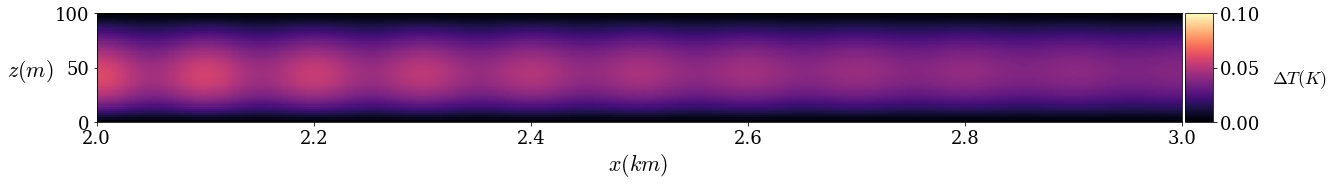

In [50]:
# Create new Figure and an Axes which fills it.
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rc('font', family='serif')
mpl.rcParams["mathtext.fontset"]='cm'
plt.rcParams['figure.figsize'] = (20.0, 12.0)
fs=18
fs_label=22

# time 
it=40
dT_current = dT[:,:,it]

fig, ax1 = plt.subplots()
plt.rc('xtick', labelsize=fs)
plt.rc('ytick', labelsize=fs)
plt.rc('axes', labelsize=fs)

ax1 = plt.gca()
# ax1.set_xlabel(r'$x$',fontsize=22)
ax1.set_ylabel(r'$z(m)$ ',rotation=0,fontsize=fs_label,loc='center')
ax1.set_xlabel(r'$x(km)$ ',rotation=0,fontsize=fs_label,loc='center')
ax1.set_xlim([xl, xr])
ax1.set_ylim([0, H])
ax1.set_xticks([2000,2200,2400,2600,2800,3000])
ax1.set_xticklabels(('2.0', '2.2', '2.4', '2.6', '2.8','3.0'))
ax1.set_aspect('equal')
ax1.yaxis.set_label_coords(-0.06, 0.35)

# plt.title(r'$\sigma_{xx}$ when $w=1$, $c=0.5$, $f=0.7$', fontsize=16, color='k')
#time_template = 'time = %.1fy'
#time_text = ax1.text(0.02, 0.75, time_template % (vt_y[it]), transform=ax1.transAxes, color='w',fontsize=18)
#time_text.set_text(time_template % (vt_y[it]))
# text=ax1.annotate(r'$t=$'+str(round(vt_y[it],2))+' y', xy=(0.05, 0.75), xycoords='axes fraction',fontsize=18,color='w')

# temperature
norm = mpl.colors.Normalize(vmin=0, vmax=0.1)
cmap = mpl.cm.magma
temperature = ax1.pcolormesh(x,z,dT_current,shading='flat',cmap=cmap,norm=norm) # plot the pcolor

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="2.5%", pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, format="%2.2f")
cbar.set_label(r'$\Delta T (K)$ ',loc='center',rotation=0,labelpad=40,fontsize=18)

plt.savefig('Heat_adv_diffusion'+'.png', bbox_inches='tight', dpi=100)

In [ ]:
time_template % (vt_y[it])

In [ ]:
vt

In [ ]:
vt[10]